In [16]:
#this is code is done using mllibs clustering for finding the k clusters
import numpy as np
import pandas as pd
from numpy import array
from math import sqrt
from pyspark.mllib.clustering import KMeans, KMeansModel
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans
import matplotlib.pyplot as plt

from pyspark.sql.functions import col


In [5]:
spark.version
sqlContext = SQLContext(sc)
batting=sqlContext.read.csv("/home/gajendra/Documents/Data_Analytics_IPL/web_scraping/batting/stats_batting_2.csv", header=True, mode="DROPMALFORMED")
bowling=sqlContext.read.csv("/home/gajendra/Documents/Data_Analytics_IPL/web_scraping/bowling/stats_bowling_1.csv", header=True, mode="DROPMALFORMED")
bowling.show()
batting.show()

+---------------+-------------+-------------+------------------+---------------+------------+-------------------+
|    player_name|runs_conceded|wickets_taken|      overs_bowled|bowling_average|economy_rate|bowling_strike_rate|
+---------------+-------------+-------------+------------------+---------------+------------+-------------------+
| A Ashish Reddy|          396|           18|43.400000000000006|           22.0|        9.12|              14.47|
|     A Chandila|          242|           11|              39.0|           22.0|        6.21|              21.27|
|    A Choudhary|          144|            5|              16.5|           28.8|        8.73|               19.8|
|    A Dananjaya|           47|            0|               4.0|           null|       11.75|               null|
|     A Flintoff|          105|            2|              11.0|           52.5|        9.55|               33.0|
|       A Kumble|         1058|           45|             160.5|          23.51|        

In [9]:
batting.na.drop()
bowling=bowling.na.drop()

FEATURES_COL=["runs_scored","balls_faced","times_out","batting_avg","strike_rate"]
FEATURES_COL_BOWL=["runs_conceded","wickets_taken","overs_bowled","bowling_average","economy_rate","bowling_strike_rate"]

# df_feat = batting.select(*(batting[c].cast("float").alias(c) for c in batting.columns[1:]))
# df_feat_bowl = bowling.select(*(bowling[c].cast("float").alias(c) for c in bowling.columns[1:]))

# df_feat_bowl.show()
# df_feat.show()

In [10]:
for col in batting.columns:
    if col in FEATURES_COL:
        batting = batting.withColumn(col,batting[col].cast('float'))

for col in bowling.columns:
    if col in FEATURES_COL_BOWL:
        bowling = bowling.withColumn(col,bowling[col].cast('float'))


In [11]:
vecAssembler = VectorAssembler(inputCols=FEATURES_COL, outputCol="features")
df_kmeans = vecAssembler.transform(batting).select('player_name', 'features')
df_kmeans.show()

vecAssembler_bowl = VectorAssembler(inputCols=FEATURES_COL_BOWL, outputCol="features_bowl")
df_kmeans_bowl = vecAssembler_bowl.transform(bowling).select('player_name', 'features_bowl')
df_kmeans_bowl.show()


+---------------+--------------------+
|    player_name|            features|
+---------------+--------------------+
| A Ashish Reddy|[280.0,193.0,15.0...|
|       A Chopra|[53.0,71.0,6.0,8....|
|    A Choudhary|[25.0,20.0,1.0,25...|
|     A Flintoff|[62.0,53.0,2.0,31...|
|       A Kumble|[35.0,47.0,3.0,11...|
|       A Mishra|[341.0,365.0,29.0...|
|       A Mithun|[34.0,26.0,5.0,6....|
|       A Mukund|[19.0,22.0,2.0,9....|
|        A Nehra|[41.0,62.0,7.0,5....|
|        A Singh|[2.0,10.0,4.0,0.5...|
|      A Symonds|[974.0,750.0,27.0...|
|       A Uniyal|[4.0,7.0,1.0,4.0,...|
|        A Zampa|[5.0,8.0,2.0,2.5,...|
|    AA Bilakhia|[69.0,85.0,5.0,13...|
|      AA Chavan|[12.0,11.0,2.0,6....|
|AA Jhunjhunwala|[217.0,210.0,13.0...|
|      AA Noffke|[9.0,10.0,1.0,9.0...|
|     AB Agarkar|[179.0,154.0,10.0...|
|      AB Barath|[42.0,42.0,2.0,21...|
|       AB Dinda|[26.0,48.0,10.0,2...|
+---------------+--------------------+
only showing top 20 rows

+---------------+--------------------+

In [12]:
vecAssembler = VectorAssembler(inputCols=FEATURES_COL, outputCol="features")
df_kmeans = vecAssembler.transform(batting).select('player_name', 'features')
df_kmeans.show()

vecAssembler_bowl = VectorAssembler(inputCols=FEATURES_COL_BOWL, outputCol="features_bowl")
df_kmeans_bowl = vecAssembler_bowl.transform(bowling).select('player_name', 'features_bowl')
df_kmeans_bowl.show()


+---------------+--------------------+
|    player_name|            features|
+---------------+--------------------+
| A Ashish Reddy|[280.0,193.0,15.0...|
|       A Chopra|[53.0,71.0,6.0,8....|
|    A Choudhary|[25.0,20.0,1.0,25...|
|     A Flintoff|[62.0,53.0,2.0,31...|
|       A Kumble|[35.0,47.0,3.0,11...|
|       A Mishra|[341.0,365.0,29.0...|
|       A Mithun|[34.0,26.0,5.0,6....|
|       A Mukund|[19.0,22.0,2.0,9....|
|        A Nehra|[41.0,62.0,7.0,5....|
|        A Singh|[2.0,10.0,4.0,0.5...|
|      A Symonds|[974.0,750.0,27.0...|
|       A Uniyal|[4.0,7.0,1.0,4.0,...|
|        A Zampa|[5.0,8.0,2.0,2.5,...|
|    AA Bilakhia|[69.0,85.0,5.0,13...|
|      AA Chavan|[12.0,11.0,2.0,6....|
|AA Jhunjhunwala|[217.0,210.0,13.0...|
|      AA Noffke|[9.0,10.0,1.0,9.0...|
|     AB Agarkar|[179.0,154.0,10.0...|
|      AB Barath|[42.0,42.0,2.0,21...|
|       AB Dinda|[26.0,48.0,10.0,2...|
+---------------+--------------------+
only showing top 20 rows

+---------------+--------------------+

In [14]:
cost = np.zeros(20)
for k in range(2,20):
    kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol("features")
    model = kmeans.fit(df_kmeans.sample(False,0.1, seed=42))
    cost[k] = model.computeCost(df_kmeans) # requires Spark 2.0 or later

cost_bowl = np.zeros(20)
for k in range(2,20):
    kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol("features_bowl")
    model = kmeans.fit(df_kmeans_bowl.sample(False,0.1, seed=42))
    cost_bowl[k] = model.computeCost(df_kmeans_bowl) # requires Spark 2.0 or later

Text(0,0.5,'cost_bowl')

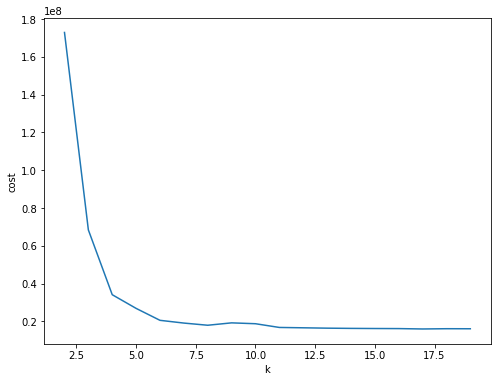

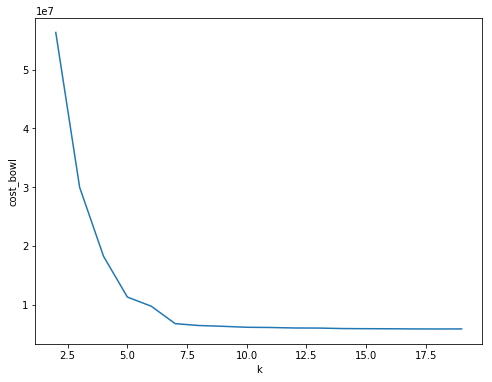

In [15]:
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,20),cost[2:20])
ax.set_xlabel('k')
ax.set_ylabel('cost')

fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,20),cost_bowl[2:20])
ax.set_xlabel('k')
ax.set_ylabel('cost_bowl')

In [17]:
#so k=10 for the batsman 
#k=7 for the bowlers
